# Stock Prices Prediction Using Keras Long Term Short Memory - Amazon


In [2]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import quandl

%matplotlib inline
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [3]:
df = quandl.get('WIKI/AMZN')

print(df.head())

             Open   High    Low     ...       Adj. Low  Adj. Close  \
Date                                ...                              
1997-05-16  22.38  23.75  20.50     ...          1.708       1.729   
1997-05-19  20.50  21.25  19.50     ...          1.625       1.708   
1997-05-20  20.75  21.00  19.63     ...          1.636       1.636   
1997-05-21  19.25  19.75  16.50     ...          1.375       1.427   
1997-05-22  17.25  17.38  15.75     ...          1.312       1.396   

            Adj. Volume  
Date                     
1997-05-16    1.470e+07  
1997-05-19    6.107e+06  
1997-05-20    5.467e+06  
1997-05-21    1.885e+07  
1997-05-22    1.178e+07  

[5 rows x 12 columns]


In [4]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend',
       'Split Ratio', 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close',
       'Adj. Volume'],
      dtype='object')

In [5]:
df.drop(['Ex-Dividend','Split Ratio', 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Volume'], axis=1)

               Open     High      Low    Close     Volume  Adj. Close
Date                                                                 
1997-05-16    22.38    23.75    20.50    20.75  1.225e+06       1.729
1997-05-19    20.50    21.25    19.50    20.50  5.089e+05       1.708
1997-05-20    20.75    21.00    19.63    19.63  4.556e+05       1.636
1997-05-21    19.25    19.75    16.50    17.13  1.571e+06       1.427
1997-05-22    17.25    17.38    15.75    16.75  9.814e+05       1.396
...             ...      ...      ...      ...        ...         ...
2018-03-21  1586.45  1590.00  1563.17  1581.86  4.667e+06    1581.860
2018-03-22  1565.47  1573.85  1542.40  1544.10  6.178e+06    1544.100
2018-03-23  1539.01  1549.02  1495.36  1495.56  7.844e+06    1495.560
2018-03-26  1530.00  1556.99  1499.25  1555.86  5.548e+06    1555.860
2018-03-27  1572.40  1575.96  1482.32  1497.05  6.793e+06    1497.050

[5248 rows x 6 columns]

In [6]:
df.to_csv('./data/AMZN.csv')

In [7]:
# Importing the training set
dataset_train = pd.read_csv('./data/AMZN.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [8]:
dataset_train.head()


         Date   Open   High     ...       Adj. Low  Adj. Close  Adj. Volume
0  1997-05-16  22.38  23.75     ...          1.708       1.729    1.470e+07
1  1997-05-19  20.50  21.25     ...          1.625       1.708    6.107e+06
2  1997-05-20  20.75  21.00     ...          1.636       1.636    5.467e+06
3  1997-05-21  19.25  19.75     ...          1.375       1.427    1.885e+07
4  1997-05-22  17.25  17.38     ...          1.312       1.396    1.178e+07

[5 rows x 13 columns]

In [9]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [10]:
# Creating a data structure with 60 timesteps and 1 output
# Tried All data point, 1500, 900
X_train = []
y_train = []
for i in range(60, 900):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [12]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [13]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 200, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [14]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 200, return_sequences = True))
regressor.add(Dropout(0.2))

In [15]:

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 200, return_sequences = True))
regressor.add(Dropout(0.2))

In [16]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 200))
regressor.add(Dropout(0.2))


In [17]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



Epoch 1/100
840/840 [==============================] - 23s 28ms/step - loss: 8.7210e-04
Epoch 2/100
840/840 [==============================] - 25s 30ms/step - loss: 6.9517e-04
Epoch 3/100
840/840 [==============================] - 24s 28ms/step - loss: 2.9642e-04
Epoch 4/100
840/840 [==============================] - 27s 33ms/step - loss: 2.8304e-04
Epoch 5/100
840/840 [==============================] - 28s 33ms/step - loss: 2.5135e-04
Epoch 6/100
840/840 [==============================] - 28s 34ms/step - loss: 2.1392e-04
Epoch 7/100
840/840 [==============================] - 25s 30ms/step - loss: 1.9205e-04
Epoch 8/100
840/840 [==============================] - 25s 30ms/step - loss: 1.8725e-04
Epoch 9/100
840/840 [==============================] - 30s 36ms/step - loss: 1.8279e-04
Epoch 10/100
840/840 [==============================] - 38s 46ms/step - loss: 1.6491e-04
Epoch 11/100
840/840 [==============================] - 37s 44ms/step - loss: 1.5001e-04
Epoch 12/100
840/840 [========

In [18]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of Apr - Nov 2018
dataset_test = pd.read_csv('./data/AMZN18.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [19]:
# Getting the predicted stock price of 2018
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 468):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


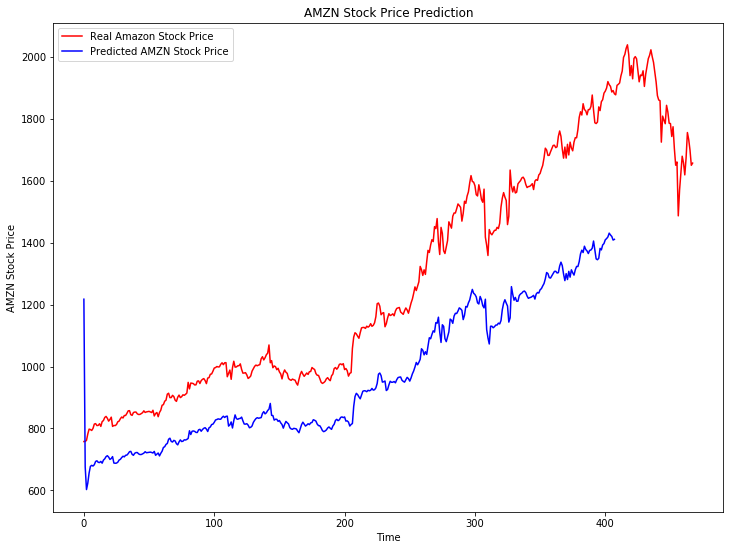

In [22]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Amazon Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted AMZN Stock Price')
plt.title('AMZN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AMZN Stock Price')
plt.legend()
plt.rcParams['figure.figsize'] = (16,9)
plt.show()

In [21]:
import pandashells